In [71]:
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_excel("NHEFS.xls")
df.head()

,seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
0,233,0,0,NaN,NaN,NaN,175.0,96.0,0,42,...,2,NaN,197.0,0.0,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381
1,235,0,0,NaN,NaN,NaN,123.0,80.0,0,36,...,2,NaN,301.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969
2,244,0,0,NaN,NaN,NaN,115.0,75.0,1,56,...,0,2.0,157.0,0.0,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251
3,245,0,1,85.0,2.0,14.0,148.0,78.0,0,68,...,2,NaN,174.0,0.0,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993
4,252,0,0,NaN,NaN,NaN,118.0,77.0,0,40,...,2,NaN,216.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969


In [10]:
df.columns

Index(['seqn', 'qsmk', 'death', 'yrdth', 'modth', 'dadth', 'sbp', 'dbp', 'sex',
       'age', 'race', 'income', 'marital', 'school', 'education', 'ht', 'wt71',
       'wt82', 'wt82_71', 'birthplace', 'smokeintensity', 'smkintensity82_71',
       'smokeyrs', 'asthma', 'bronch', 'tb', 'hf', 'hbp', 'pepticulcer',
       'colitis', 'hepatitis', 'chroniccough', 'hayfever', 'diabetes', 'polio',
       'tumor', 'nervousbreak', 'alcoholpy', 'alcoholfreq', 'alcoholtype',
       'alcoholhowmuch', 'pica', 'headache', 'otherpain', 'weakheart',
       'allergies', 'nerves', 'lackpep', 'hbpmed', 'boweltrouble', 'wtloss',
       'infection', 'active', 'exercise', 'birthcontrol', 'pregnancies',
       'cholesterol', 'hightax82', 'price71', 'price82', 'tax71', 'tax82',
       'price71_82', 'tax71_82'],
      dtype='object')

# Density

(array([1.73283291e-02, 2.70415181e-02, 4.67010125e-02, 1.72506236e-02,
        1.46863417e-02, 6.21644093e-04, 1.70952126e-03, 1.16558267e-03,
        0.00000000e+00, 7.77055117e-05]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

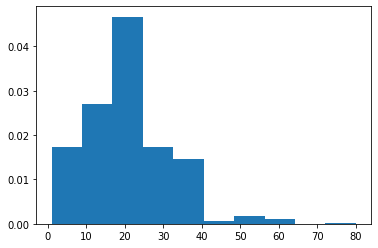

In [37]:
plt.hist(df['smokeintensity'], density=True)

# num = scipy.stats.norm.pdf(df['smokeintensity'], 
#                            loc=df['smokeintensity'].mean(),
#                            scale=df['smokeintensity'].std())
# # plt.plot(df['smokeintensity'], num);

# Bar
https://benalexkeen.com/bar-charts-in-matplotlib/

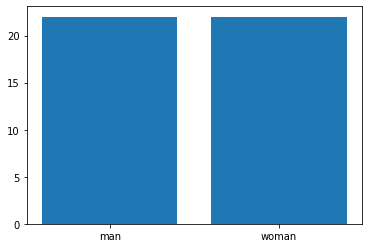

In [86]:
plt.bar(df.sex.replace({1:'woman', 0:'man'}), df.income)

plt.show()

#### bar chart with errors

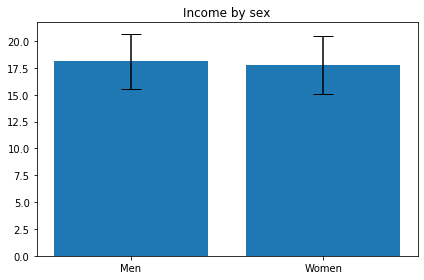

In [85]:
fig, ax = plt.subplots()
Men = df[df['sex']==0]['income']
Women = df[df['sex']==1]['income']

men_mean = np.mean(Men)
women_mean = np.mean(Women)
men_std = np.std(Men)
women_std = np.std(Women)

# Create lists for the plot
sex = ['Men', 'Women']
x_pos = np.arange(len(sex))
CTEs = [men_mean, women_mean]
error = [men_std, women_std]

ax.bar(x_pos, CTEs, yerr=error, align='center', ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(sex)
# ax.yaxis.grid(True)
ax.set_title('Income by sex')
plt.tight_layout()
plt.show()

#### Bar Chart with Multiple X’s

In [90]:
men_means = df[df['sex'] == 0].groupby('qsmk')['income'].mean()

In [91]:
men_means

qsmk
0    18.096539
1    18.177273
Name: income, dtype: float64

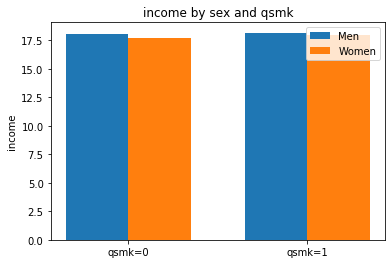

In [101]:
N = len(df['qsmk'].unique())
ind = np.arange(N) 

men_means = df[df['sex'] == 0].groupby('qsmk')['income'].mean().values
women_means = df[df['sex'] == 1].groupby('qsmk')['income'].mean().values

width = 0.35       

# plt.figure(figsize=(10,8))
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width, label='Women')

plt.ylabel('income')
plt.title('income by sex and qsmk')

plt.xticks(ind + width / 2, ('qsmk=0', 'qsmk=1'))
plt.legend(loc='upper right')
plt.show()

# Scatter

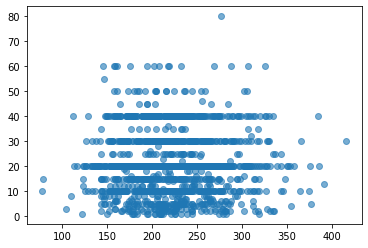

In [33]:
plt.scatter(df.cholesterol, df.smokeintensity, alpha=0.6)

# CI

In [129]:
def randomly_permute(paired_outcomes):
    for _, row in paired_outcomes.iterrows():
        np.random.shuffle(row)
    return paired_outcomes

In [132]:
def median_diff(paired_outcomes):
    return (paired_outcomes.men.mean() 
            - paired_outcomes.women.mean())

In [109]:
def plot_bootstrapped(stats, observed_stat, ci):
    lower = (1 - ci) / 2
    upper = 1 - lower
    plt.hist(stats)
    qs = np.quantile(stats, q=[lower, 0.5, upper])
    plt.axvline(observed_stat, color='k', label='obs');
    plt.axvline(qs[1], color='r', label='exp. null')
    plt.axvline(
        qs[0], color='r', linestyle='-.', label=f'{100 * ci}% Boot CI')
    plt.axvline(qs[2], color='r', linestyle='-.')
    plt.legend()
    plt.show()
    for q, val in zip(['lower bound', 'expected', 'upper bound'], qs):
        print(f'{q:11s}: {val}')

In [133]:
def bootstrap(
        paired_outcomes, f, iters=500, verbose=True, plot=True, ci=0.95):
    '''
    f: function acting on paired outcomes to compute the desired statistic
    '''
    observed_stat = f(paired_outcomes)
    stats = []
    for i in range(iters):
        if verbose and i % 100 == 0:
            print(f'{100 * i / iters}% complete...', end='\r')
        permutation = randomly_permute(paired_outcomes.copy())
        stat = f(permutation)
        stats.append(stat)
    print('Done!\n')
    stats = np.array(stats)
    if plot:
        plot_bootstrapped(stats, observed_stat, ci)
    return stats

In [136]:
men = df[df['sex'] == 0]['income']
women = df[df['sex'] == 1]['income']

data = pd.concat([men, women], axis=1)
data.columns = ['men', 'women']

Done! complete...



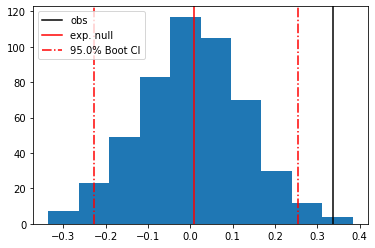

lower bound: -0.22694960887807192
expected   : 0.00779153937358501
upper bound: 0.25460628645312383


In [137]:
stats = bootstrap(data, median_diff)